In [1]:
import os
import pandas as pd
os.chdir(r"C:\Users\user\jupyter\python\preprocessing\데이터")

In [51]:
df = pd.read_csv("2019년_시간대별_상품판매량.csv", engine = "python")
df.head(10) # 일별 판매 개수를 보여주고 있다. 


,날짜,상품1,상품2,상품3
0,2019-01-01,48,48,50
1,2019-01-02,48,44,49
2,2019-01-03,48,54,50
3,2019-01-04,53,42,48
4,2019-01-05,46,42,50
5,2019-01-06,43,52,42
6,2019-01-07,48,48,51
7,2019-01-08,50,52,50
8,2019-01-09,53,49,55
9,2019-01-10,57,52,51


In [41]:
# 기본 환경설정
from matplotlib import pyplot as plt
import numpy as np
 
%matplotlib inline  
# 셀에 그래프를 직접 출력할 수 있다.
plt.rcParams["font.family"] = 'Malgun Gothic'
plt.rcParams["font.size"] = 20
plt.rcParams["figure.figsize"] = (30, 10)
# 전반적인 설정

#### pyplot을 사용한 그래프 그리기

In [46]:
np.cumsum([1, 2, 3]) # 누적 합 반환
xtick_range = np.cumsum([0, 31, 28, 31, 30, 31, 30, 31, 31, 30, 31, 30]) # 월별 일 수 누적을 통한 매월 1일 인덱스 정의 (12월 제외)
xtick_range
### 날짜가 데이터 내에서 어떤 위치에 있는지 확인하기 위해서 사용함. 
# type(df['날짜'].loc[xtick_range])

array([  0,  31,  59,  90, 120, 151, 181, 212, 243, 273, 304, 334],
      dtype=int32)

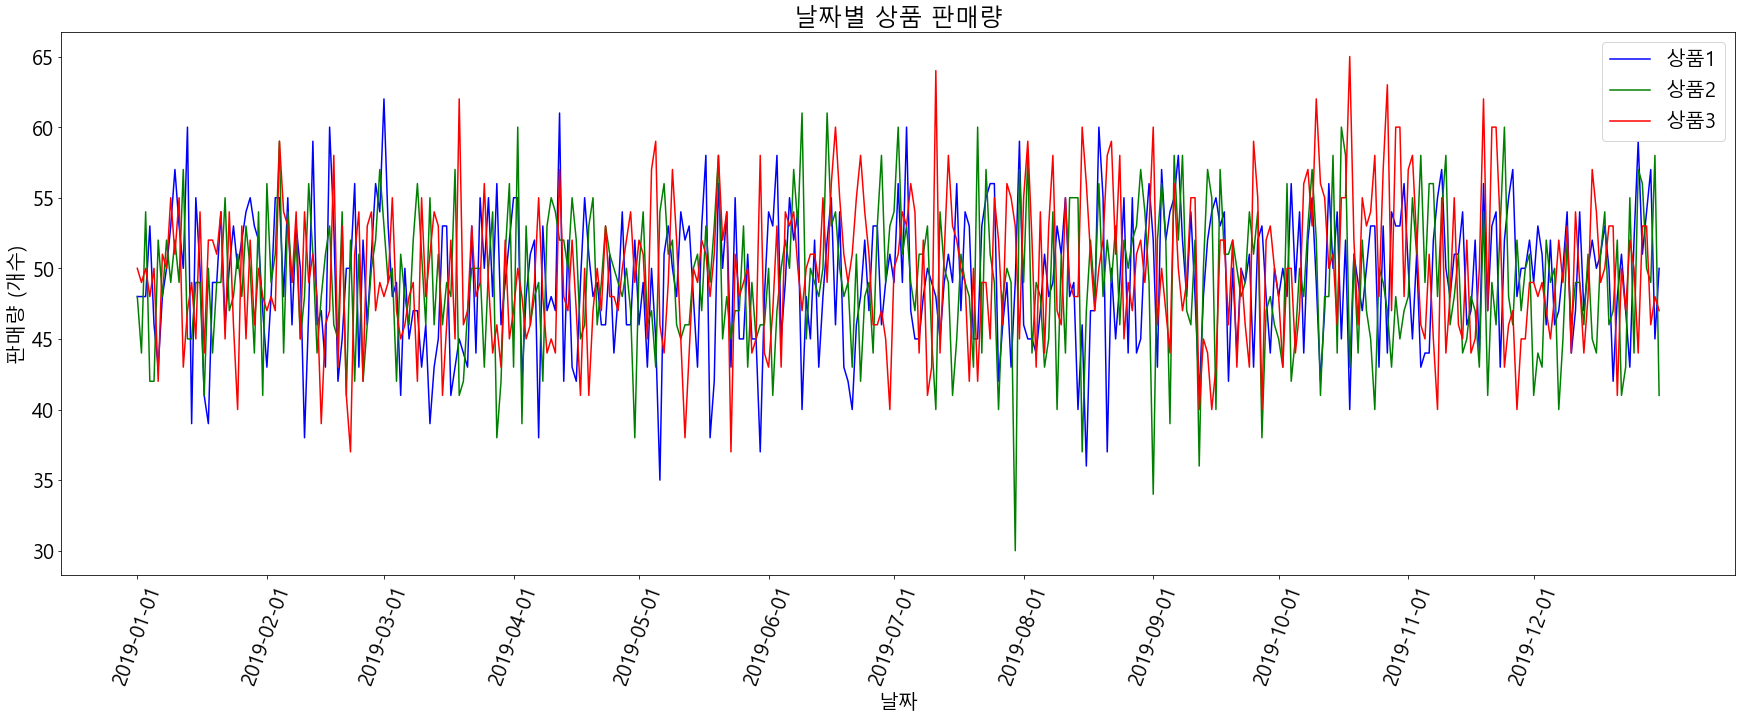

In [50]:
# 그래프 기본 설정
# 축의 이름과 그래프의 이름. kwargs : 특정 그래프에서만 적용됨. 
plt.title("날짜별 상품 판매량")  # loc: 위치
plt.xlabel("날짜")
plt.ylabel("판매량 (개수)")

# 그래프의 눈금을 의미한다. 
# xticks(ticks, labels): 위치에 label을 입력한다. 
xtick_range = np.cumsum([0, 31, 28, 31, 30, 31, 30, 31, 31, 30, 31, 30]) # 월별 일 수 누적을 통한 매월 1일 인덱스 정의 (12월 제외)
plt.xticks(xtick_range, df['날짜'].loc[xtick_range], rotation = 70) # 반드시 다른 셀에서 확인해본 후 넣어준다
# 365개의 데이터가 출력된다. 위에 지정된 위치에 ~한 이름을 넣어준다. 

plt.plot(df['날짜'], df['상품1'], label = '상품1', color = 'b')   # x, y는 반드시 순회 가능해야 한다. 길이가 같아야 한다. 각각 대응되어야 하기 때문이다. 
plt.plot(df['날짜'], df['상품2'], label = '상품2', color = 'g')
plt.plot(df['날짜'], df['상품3'], label = '상품3', color = 'r')

plt.legend()
# 범례 표시. 미리 그래프 내에서 label을 붙여줘야지만 범례 표시할 때 그래프 내에 드러나게 된다. 가장 비어 있는 곳으로 범례를 출력함.  

#### DataFrame을 이용하여 직접 그래프 그리기

([<matplotlib.axis.XTick at 0x1ba9646be48>,
 <a list of 12 Text xticklabel objects>)

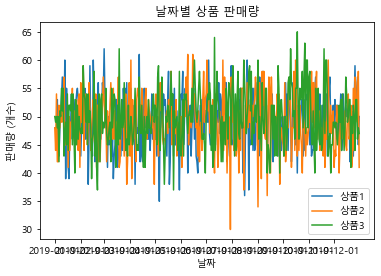

In [7]:
# 그래프 기본 설정
xtick_range = np.cumsum([0, 31, 28, 31, 30, 31, 30, 31, 31, 30, 31, 30]) # 월별 일 수 누적을 통한 매월 1일 인덱스 정의 (12월 제외)
df.plot(kind = 'line', x = '날짜', y = ['상품1', '상품2', '상품3'])

plt.title("날짜별 상품 판매량")
plt.xlabel("날짜")
plt.ylabel("판매량 (개수)")
plt.xticks(xtick_range, df['날짜'].loc[xtick_range])

#### groupby를 이용한 그래프 그리기

In [20]:
df['날짜'].head()

0    2019-01-01
1    2019-01-02
2    2019-01-03
3    2019-01-04
4    2019-01-05
Name: 날짜, dtype: object

In [27]:
df['날짜'].str.split('-', expand = True).head() # True 해주면 그대로 dataframe 을 반환해준다. 

,0,1,2
0,2019,01,01
1,2019,01,02
2,2019,01,03
3,2019,01,04
4,2019,01,05


In [57]:
df['월'] = df['날짜'].str.split('-', expand = True).iloc[:, 1]  # 전체 행의 두번째 위치에 있는 칼럼을 그대로 붙이고 싶다. 기존 dataframe을 변환하는 것이기 때문에 나중에 원본 데이터랑 비교해보고 싶으면 copy로 만들어주기
# 월별 상품 판매량을 확인하고 싶을 때. 

In [58]:
df.head()

,날짜,상품1,상품2,상품3,월
0,2019-01-01,48,48,50,01
1,2019-01-02,48,44,49,01
2,2019-01-03,48,54,50,01
3,2019-01-04,53,42,48,01
4,2019-01-05,46,42,50,01


In [60]:
df1 = df.groupby('월' , as_index = False)[['상품1', '상품2', '상품3']].sum()
df1

,월,상품1,상품2,상품3
0,01,1545,1501,1521
1,02,1391,1388,1372
2,03,1488,1510,1514
3,04,1461,1483,1449
4,05,1485,1511,1530
5,06,1473,1508,1513
6,07,1548,1519,1558
7,08,1494,1545,1599
8,09,1506,1480,1464
9,10,1550,1499,1644


([<matplotlib.axis.XTick at 0x1ba96529b70>,
 <a list of 12 Text xticklabel objects>)

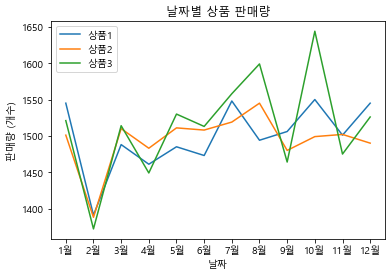

In [13]:
df.groupby('월')[['상품1', '상품2', '상품3']].sum().plot(kind = 'line') # default를 썼으므로, 인덱스가 x축으로 모든 컬럼이 y축으로 들어감
plt.title("날짜별 상품 판매량")
plt.xlabel("날짜")
plt.ylabel("판매량 (개수)")
plt.xticks(range(12), [str(i + 1) + '월' for i in range(12)])

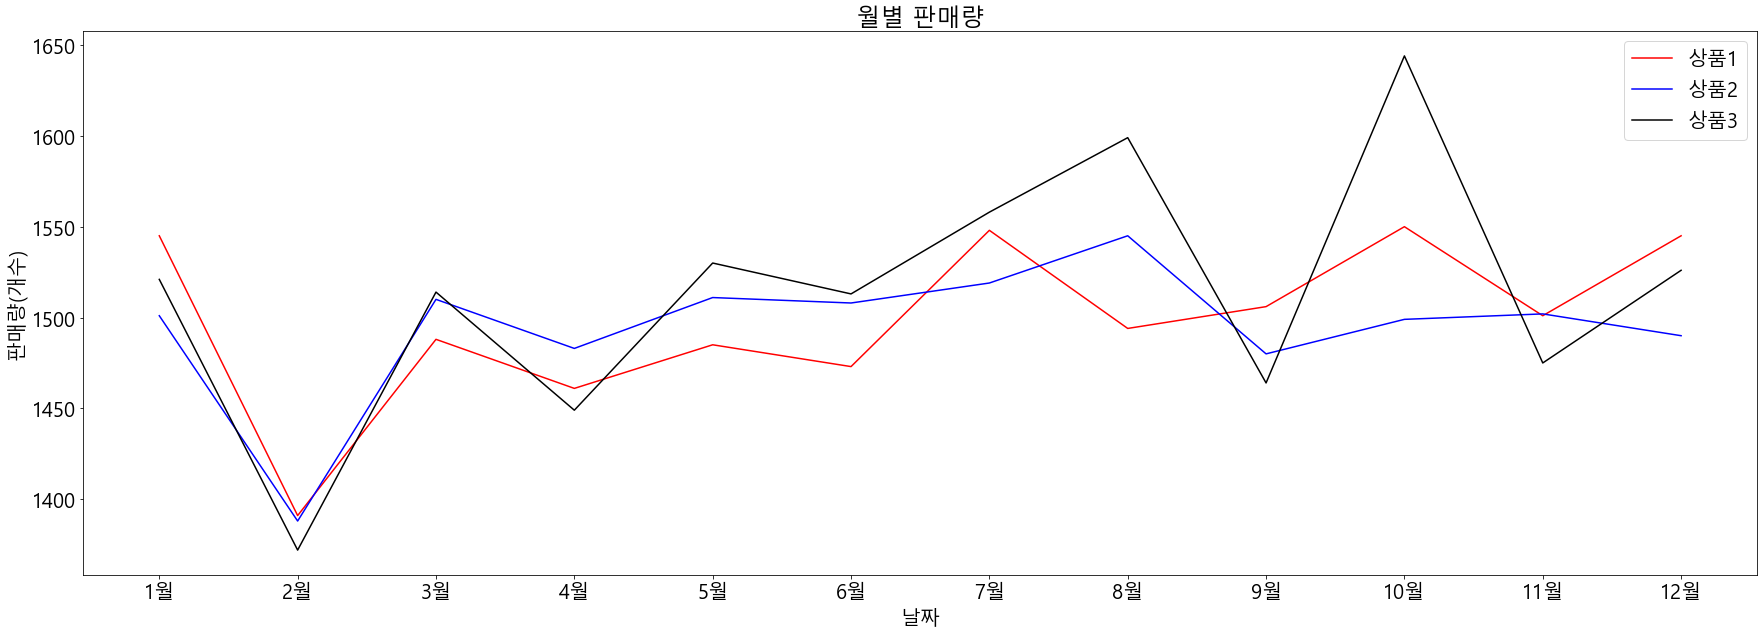

In [61]:
plt.title('월별 판매량')
plt.xlabel('날짜')
plt.ylabel('판매량(개수)')
plt.xticks(range(12), [str(i+1)+'월' for i in range(12)])  # str으로 묶어주는 것. 

plt.plot(df1['월'], df1['상품1'], label = '상품1', color = 'r')
plt.plot(df1['월'], df1['상품2'], label = '상품2', color = 'b')
plt.plot(df1['월'], df1['상품3'], label = '상품3', color = 'k')

plt.legend()